In [49]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [50]:
df = pd.read_csv('/content/train.csv',usecols=['Age','Fare','Survived'])

In [51]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [52]:
df.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [53]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

<ipython-input-53-26113ea9078d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [54]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [55]:
X = df.iloc[:,1:3]
y = df.iloc[:,0]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [57]:
!pip install seaborn --upgrade

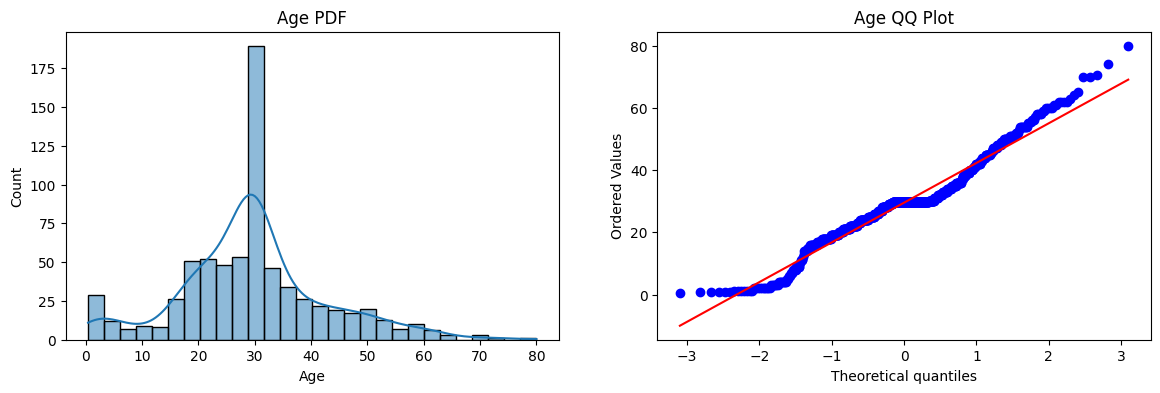

In [58]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'],kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')

plt.show()

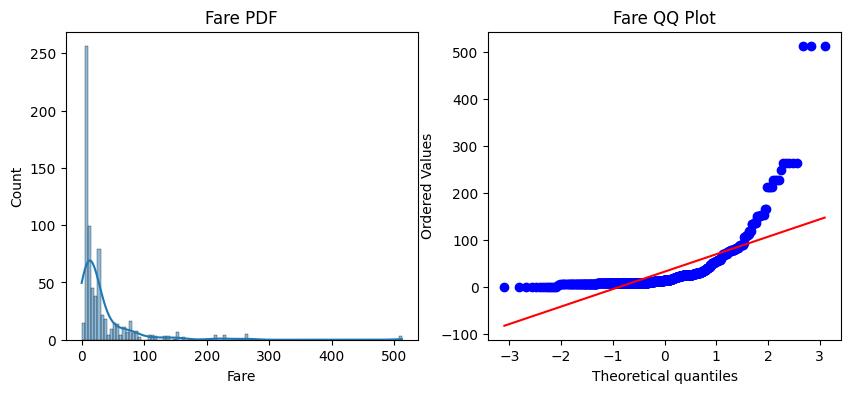

In [59]:
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.histplot(X_train['Fare'],kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [60]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [61]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred1))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6815642458100558


In [62]:
trf = FunctionTransformer(func=np.log1p)

In [63]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [64]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred1 = clf1.predict(X_test_transformed)
y_pred2 = clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred1))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6983240223463687


In [65]:
# Cross validation
X_transformed = trf.fit_transform(X)

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf1,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.6588389513108613


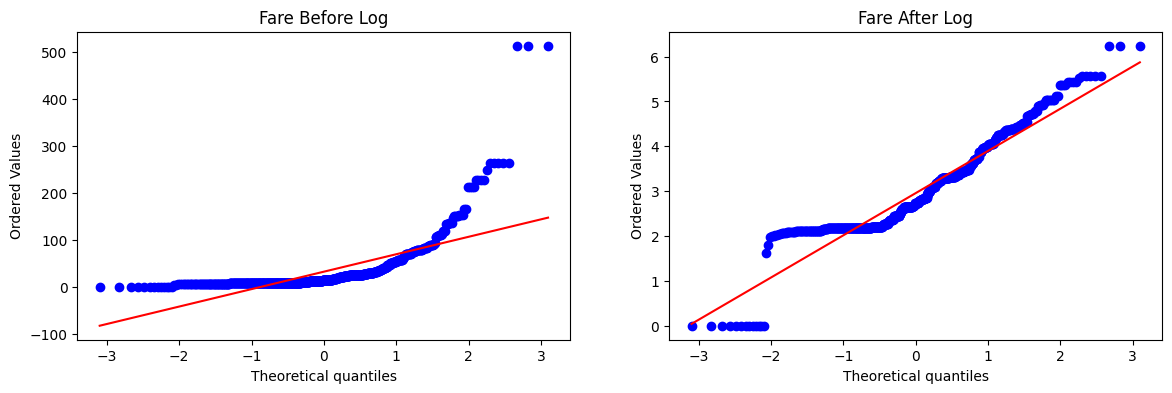

In [66]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist="norm",plot=plt)
plt.title('Fare After Log')

plt.show()

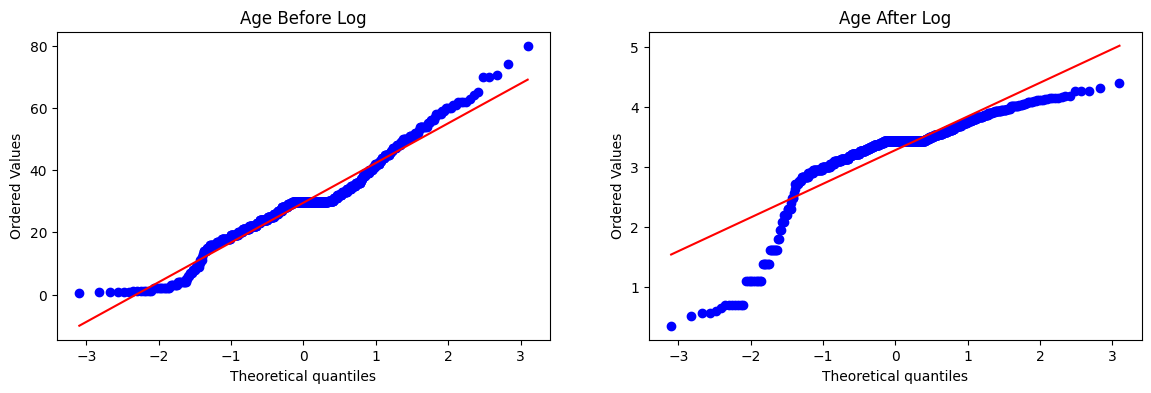

In [67]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist="norm",plot=plt)
plt.title('Age After Log')

plt.show()

In [68]:
trf1 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed1 = trf1.fit_transform(X_train)
X_test_transformed1 = trf1.transform(X_test)

In [70]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train_transformed1,y_train)
clf2.fit(X_train_transformed1,y_train)

y_pred1 = clf1.predict(X_test_transformed1)
y_pred2 = clf2.predict(X_test_transformed1)

print("Accuracy LR",accuracy_score(y_test,y_pred1))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6927374301675978


In [71]:
X_transformed1 = trf1.fit_transform(X)

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf1,X_transformed1,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed1,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6577403245942571


In [83]:
def apply_transform(transform):
  X = df.iloc[:,1:3]
  y = df.iloc[:,0]

  trf = ColumnTransformer([('transform',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

  X_transformed = trf.fit_transform(X)

  clf = LogisticRegression()

  print("Accuracy",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))

  plt.figure(figsize=(14,4))

  plt.subplot(121)
  stats.probplot(X['Fare'],dist="norm",plot=plt)
  plt.title('Fare Before Transform')

  plt.subplot(122)
  stats.probplot(X_transformed[:,0],dist="norm",plot=plt)
  plt.title('Fare After Transform')

  plt.show()

Accuracy 0.6195131086142323


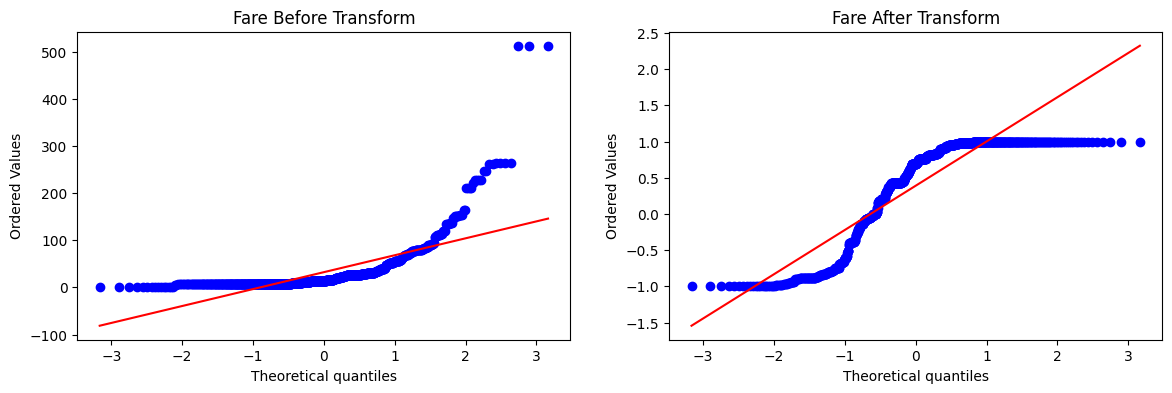

In [84]:
apply_transform(np.sin)

Accuracy 0.6184144818976279


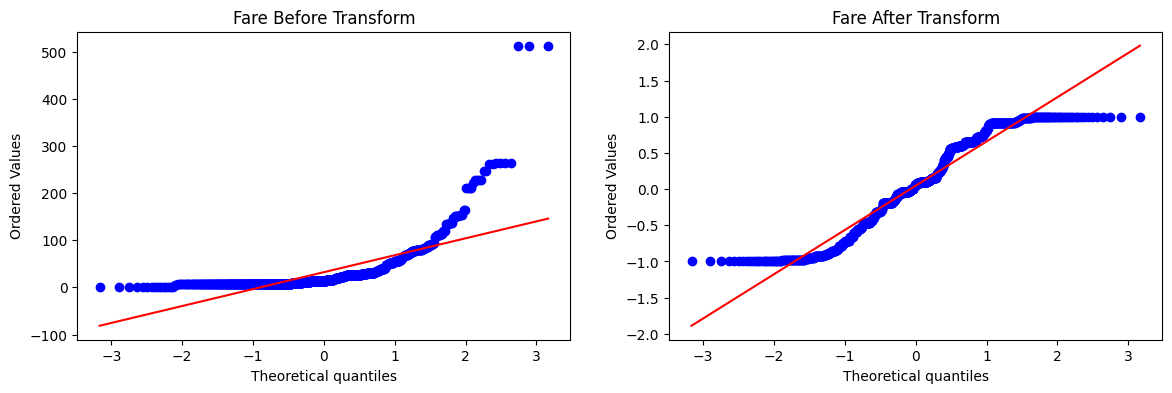

In [85]:
apply_transform(np.cos)

Accuracy 0.6611485642946316


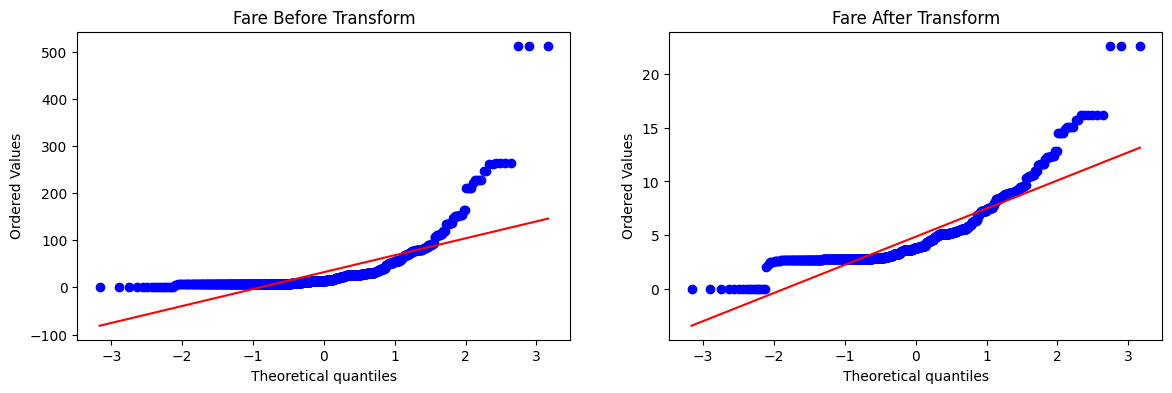

In [86]:
apply_transform(np.sqrt)

Accuracy 0.6712609238451936


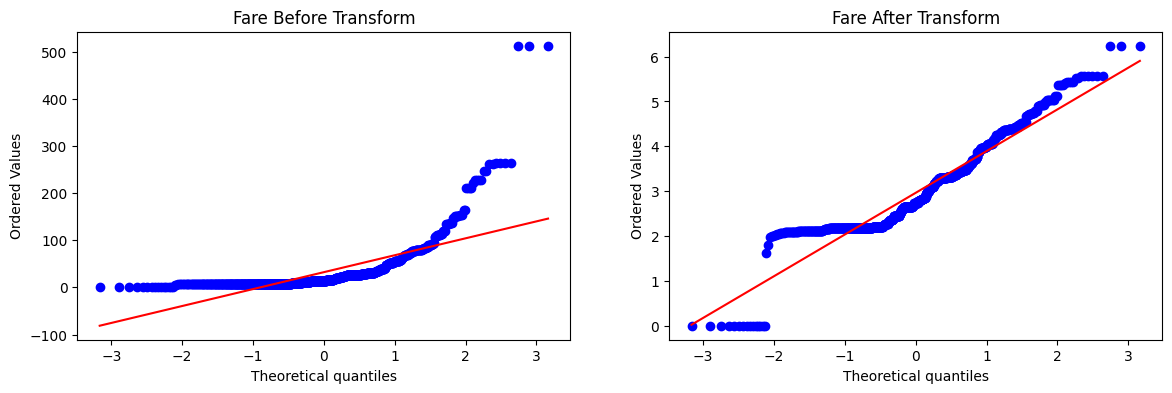

In [87]:
apply_transform(np.log1p)

Accuracy 0.6589013732833957


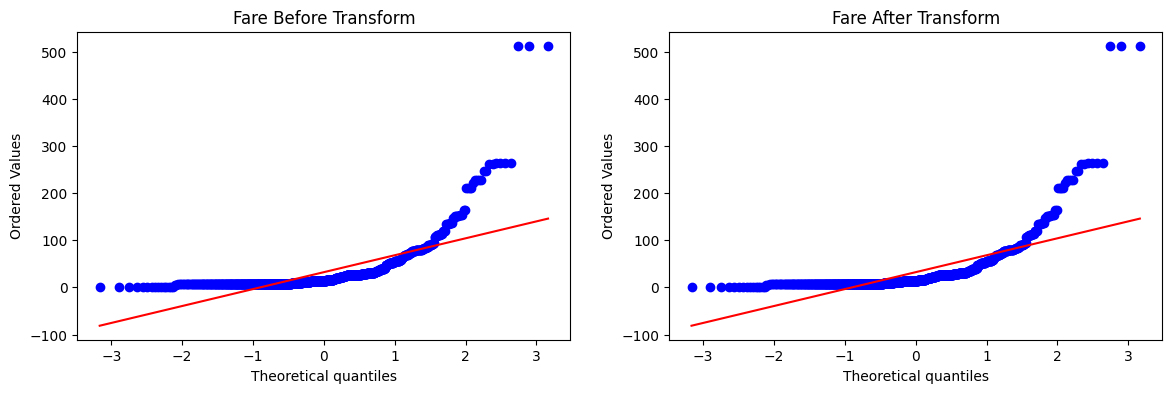

In [89]:
apply_transform(lambda x : x)

Accuracy 0.6431335830212235


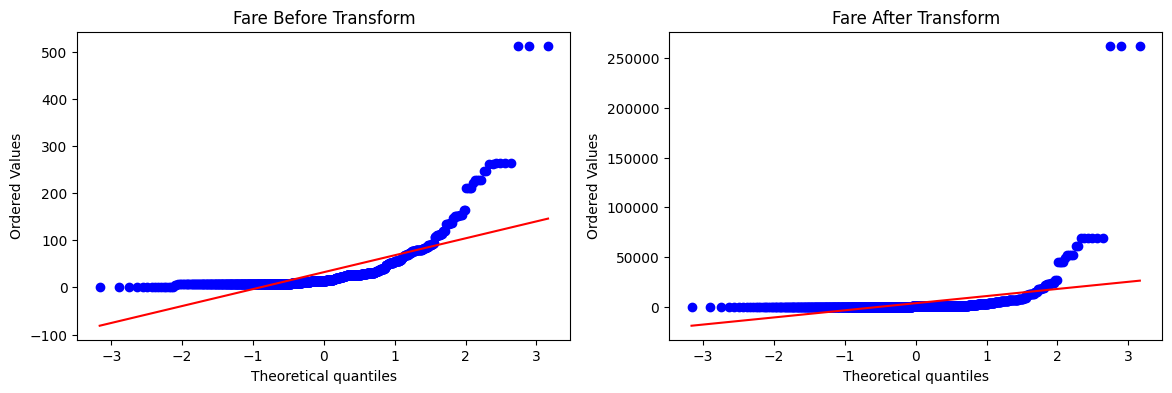

In [90]:
apply_transform(lambda x : x**2)